# PA04

## Name: Chandan Patel

## Challenge

In this notebook we will analysze the sentiment from a dataset on how travelers tweeted about their airline-related feelings, scraped from Twitter in February 2015. 

Measure the accuracy of the sentiment analysis from NLTK and TextBlob by comparing the sentiment analysis to the actual sentiment of the tweet.


In [1]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from matplotlib import pyplot as plt

from nltk.tokenize import TweetTokenizer

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from textblob import TextBlob
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# read in the data 
df = pd.read_csv('data/Tweets_PA04.csv') 
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
df = df.drop(columns=["tweet_id", "name", "retweet_count", "airline_sentiment_confidence", "negativereason", "negativereason_confidence",
                     "airline_sentiment_gold", "negativereason_gold", "tweet_coord", "tweet_created", "tweet_location", "user_timezone"]) ## drop unnecessary columns

In [5]:
df.head()

,airline_sentiment,airline,text
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...


In [6]:
tokenizer = TweetTokenizer()

def clear_text(text):
    # tokenize the text
    tokens = tokenizer.tokenize(text)
    
    # remove all tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    
    # make lowercase
    tokens = [word.lower() for word in tokens]

    # remove all tokens that are only one character
    tokens = [word for word in tokens if len(word) > 1]

    return ' '.join(tokens)

df['clean_text']=df.text.apply(lambda x: clear_text(x))   


In [7]:
df.head(20)

,airline_sentiment,airline,text,clean_text
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.,what said
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...,plus added commercials to the experience tacky
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...,today must mean need to take another trip
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...,really aggressive to blast obnoxious entertain...
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...,and really big bad thing about it
5,negative,Virgin America,@VirginAmerica seriously would pay $30 a fligh...,seriously would pay flight for seats that have...
6,positive,Virgin America,"@VirginAmerica yes, nearly every time I fly VX...",yes nearly every time fly vx this ear worm won...
7,neutral,Virgin America,@VirginAmerica Really missed a prime opportuni...,really missed prime opportunity for men withou...
8,positive,Virgin America,"@virginamerica Well, I didn't…but NOW I DO! :-D",well but now do
9,positive,Virgin America,"@VirginAmerica it was amazing, and arrived an ...",it was amazing and arrived an hour early too g...


### Sentiment analysis using TextBlob

In [8]:
analyzer = SentimentIntensityAnalyzer()

df['tb_polarity'] = df['clean_text'].apply(lambda x: TextBlob(x).polarity)

def categorize_sentiment(polarity):
    if -0.10 <= polarity <= 0.10:
        return 'neutral'
    elif polarity > 0.1:
        return 'positive'
    else:
        return 'negative'

df['tb_sentiment'] = df['tb_polarity'].apply(categorize_sentiment)
df.head(20)

,airline_sentiment,airline,text,clean_text,tb_polarity,tb_sentiment
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.,what said,0.000000,neutral
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...,plus added commercials to the experience tacky,0.000000,neutral
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...,today must mean need to take another trip,-0.312500,negative
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...,really aggressive to blast obnoxious entertain...,0.006250,neutral
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...,and really big bad thing about it,-0.350000,negative
5,negative,Virgin America,@VirginAmerica seriously would pay $30 a fligh...,seriously would pay flight for seats that have...,-0.208333,negative
6,positive,Virgin America,"@VirginAmerica yes, nearly every time I fly VX...",yes nearly every time fly vx this ear worm won...,0.450000,positive
7,neutral,Virgin America,@VirginAmerica Really missed a prime opportuni...,really missed prime opportunity for men withou...,0.200000,positive
8,positive,Virgin America,"@virginamerica Well, I didn't…but NOW I DO! :-D",well but now do,0.000000,neutral
9,positive,Virgin America,"@VirginAmerica it was amazing, and arrived an ...",it was amazing and arrived an hour early too g...,0.466667,positive


### Sentiment analysis using NLTK

In [9]:
analyzer = SentimentIntensityAnalyzer()

df['nltk_polarity'] = df['clean_text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Classify sentiments based on the nltk_polarity
def classify_sentiment(polarity):
    if -0.10 < polarity < 0.10:
        return 'neutral'
    elif polarity >= 0.1:
        return 'positive'
    else:
        return 'negative'

df['nltk_sentiment'] = df['nltk_polarity'].apply(classify_sentiment)

df.sample(n=20)

,airline_sentiment,airline,text,clean_text,tb_polarity,tb_sentiment,nltk_polarity,nltk_sentiment
6717,negative,Southwest,@SouthwestAir has the WORST customer service o...,has the worst customer service of any airline ...,-1.000000,negative,-0.6249,negative
5655,neutral,Southwest,@SouthwestAir I will dm you now,will dm you now,0.000000,neutral,0.0000,neutral
11589,negative,US Airways,@USAirways that link leads to a website that w...,that link leads to website that open on cell p...,-0.100000,negative,0.0516,neutral
10499,negative,US Airways,@USAirways We did. @AmericanAir said to open o...,we did said to open one with you too,0.000000,neutral,0.0000,neutral
8667,negative,Delta,@JetBlue all taken care of .... Other then the...,all taken care of other then the dropped call ...,-0.097222,neutral,0.4939,positive
12271,neutral,American,@AmericanAir and then wanted to change it to B...,and then wanted to change it to ba for avios,0.000000,neutral,0.0000,neutral
14426,negative,American,"@AmericanAir no one received text alerts, auto...",no one received text alerts automated calls an...,0.000000,neutral,-0.5267,negative
7174,negative,Delta,@JetBlue Sure did go south after breakfast tho...,sure did go south after breakfast though delay...,0.500000,positive,0.1027,positive
6610,negative,Southwest,@SouthwestAir is there a problem with the webs...,is there problem with the website tried making...,0.000000,neutral,-0.6059,negative
7776,neutral,Delta,@JetBlue what's the status of flight 1272 dive...,the status of flight diverted to ric when will...,0.000000,neutral,0.0000,neutral


## Challenge: Which sentiment analysis is more accurate: NLTK or Textblob by comparing the sentiment analysis to the actual sentiment of the tweet.

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

### Accuracy Score when comparing Textblob sentiments vs actual sentiments of the tweets

In [11]:
# Calculate accuracy
accuracy = accuracy_score(df['airline_sentiment'], df['tb_sentiment'])
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 41.80%


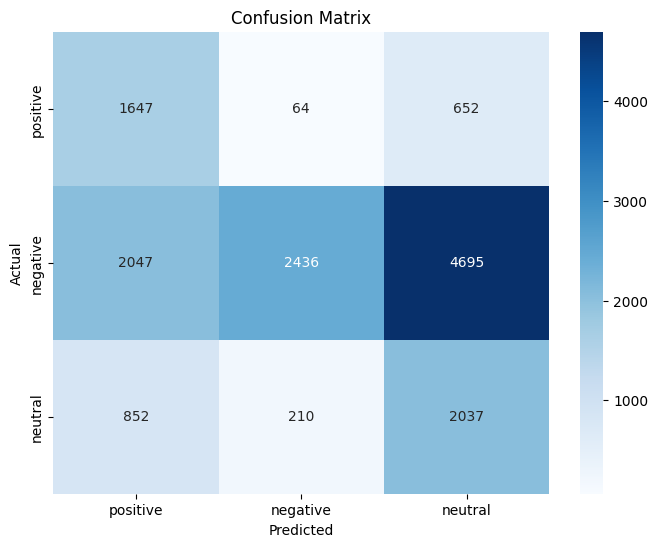

In [12]:
# Confusion Matrix plot
# Generate confusion matrix
conf_matrix = confusion_matrix(df['airline_sentiment'], df['tb_sentiment'], labels=['positive', 'negative', 'neutral'])

# Using ConfusionMatrixDisplay to visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['positive', 'negative', 'neutral'])

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=disp.display_labels, yticklabels=disp.display_labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

### Accuracy Score when comparing NLTK sentiments vs actual sentiments of the tweets

In [13]:
# Calculate accuracy
accuracy = accuracy_score(df['airline_sentiment'], df['nltk_sentiment'])
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 53.22%


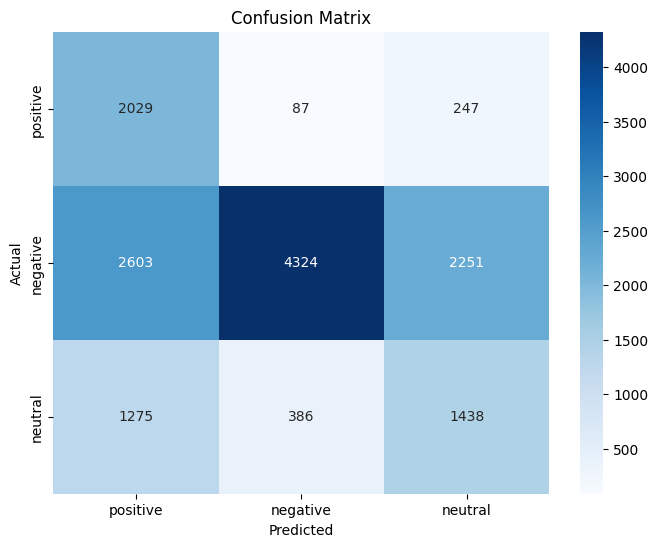

In [14]:
# Confusion matrix plot
# Generate confusion matrix
conf_matrix = confusion_matrix(df['airline_sentiment'], df['nltk_sentiment'], labels=['positive', 'negative', 'neutral'])

# Using ConfusionMatrixDisplay to visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['positive', 'negative', 'neutral'])

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=disp.display_labels, yticklabels=disp.display_labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()